# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [1]:
import pandas as pd
df = pd.read_csv("craftcans.csv", na_values = ["???"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## Read in the file `craftcans.csv`, and look at the first first rows

## How many rows do you have in the data? What are the column types?

In [2]:
df.shape

(2416, 7)

In [3]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [4]:
df.head()
df.tail()
df["Brewery"].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [5]:
df.head()
df["Size"].value_counts()

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
19.2 oz.               14
12 oz                  14
16 oz                  12
32 oz.                  5
12 ounce                1
12 & 16 oz.             1
19.2                    1
24 oz. "Silo Can"       1
8.4 oz.                 1
12 oz. Slimline         1
12 OZ.                  1
16.9 oz.                1
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
## removing % or stings from columns
df["ABV"] = df["ABV"].str.replace("%", "")
df["ABV"].value_counts()
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25.0


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [7]:

### Removing a row
#df = df[df.ABV != '???']
## converting it to a float
df["ABV"] = df["ABV"].astype(float)
df.head()



,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [8]:
df.head()
df["Location"].value_counts()

Grand Rapids, MI           66
Chicago, IL                55
Portland, OR               52
Indianapolis, IN           43
San Diego, CA              42
Boulder, CO                41
Denver, CO                 40
Brooklyn, NY               38
Seattle, WA                35
Longmont, CO               33
San Francisco, CA          32
Tampa, FL                  31
Stevens Point, WI          30
Austin, TX                 25
Fort Collins, CO           22
Cincinnati, OH             21
Boston, MA                 21
Aurora, IN                 20
Saint Louis, MO            19
Chandler, AZ               19
Eagle, CO                  19
Boonville, CA              18
Davenport, IA              18
Manhattan, KS              18
Missoula, MT               18
Boise, ID                  17
Salt Lake City, UT         17
Minneapolis, MN            16
Durango, CO                16
Astoria, OR                16
                           ..
Vista, CA                   1
Boynton Beach, FL           1
Hudsonvill

## List all of the beer from Brooklyn, NY

In [9]:
df.head()
brooklyn_df = df[df["Location"] == "Brooklyn, NY"]
brooklyn_df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0


## What brewery in Brooklyn puts out the most cans of beer?

In [10]:
brooklyn_df["Brewery"].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [11]:
Sixpoint = df[df["Brewery"] == "Sixpoint Craft Ales"]
Sixpoint["Style"].value_counts().head()

American IPA                      4
American Double / Imperial IPA    2
Cream Ale                         2
Baltic Porter                     2
German Pilsener                   2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [12]:
df.head()
NY = df[df["Location"].str.contains("NY", na = False)]
NY["Brewery"].value_counts()


Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Upstate Brewing Company           2
Montauk Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
Southampton Publick House         1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [13]:
df["IBUs"].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

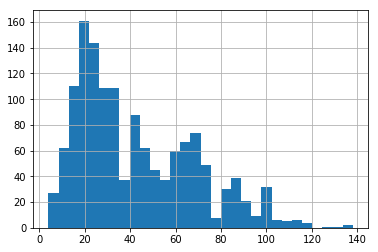

In [14]:
%matplotlib inline
df["IBUs"].hist(bins = 30)

## List all of the beers with IBUs above the 75th percentile

In [15]:
df["IBUs"].describe()
df[df["IBUs"] > 64]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [16]:
df["IBUs"].describe()
df[df["IBUs"] < 21]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

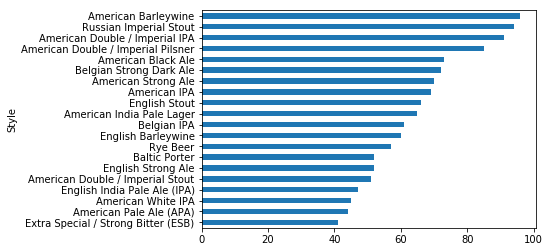

In [17]:
median_ibus = df.groupby("Style")["IBUs"].median()
median_ibus
median_ibus.dropna().sort_values().tail(20).plot(kind="barh")

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [18]:
high_IBUs = df[df["IBUs"] > 64]
print(high_IBUs["Style"].value_counts().head())

low_IBUs = df[df["IBUs"] < 21]
print(low_IBUs["Style"].value_counts().head())


American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

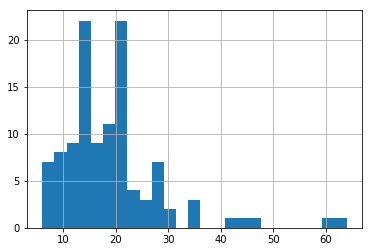

In [19]:
df.head()
df_W_H_APWA = df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]
df_W_H_APWA["IBUs"].mean()
df_W_H_APWA["IBUs"].hist(bins = 25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

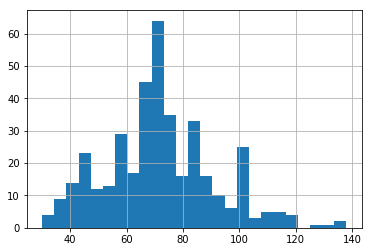

In [20]:
df.head()
IPA = df[df["Style"].str.contains("IPA", na = False)]
IPA["IBUs"].mean()
IPA["IBUs"].hist(bins = 25)

## Plot those two histograms on top of one another

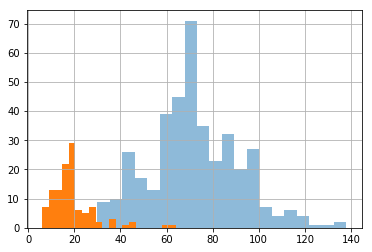

In [21]:
ax = IPA["IBUs"].hist(bins = 20, alpha = 0.5)
df_W_H_APWA["IBUs"].hist(bins = 20, ax = ax)

## Compare the ABV of wheat beers vs. IPAs 

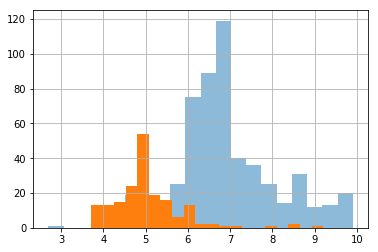

In [24]:
df.head(20)
ax = IPA["ABV"].hist(bins = 20, alpha = 0.5)
df_W_H_APWA["ABV"].hist(bins = 20, ax = ax)

#df_W_H_APWA["ABV"]

